# Multiomics modeling

Let's look at the paper *"Multiomics modeling of the immunome, transcriptome, microbiome, proteome and metabolome adaptations during human pregnancy"* by **Ghaemi et al. 2019** (`task1_multiomics_ghaemi2019multiomics.pdf`).
The idea is to use different modalities (measurements collected from the immune system, microbiome, etc.) to characterize biological changes during pregnancy. 
This includes whether we can predict the gestational age of a mother solely based on the collected biomarkers.

**Note**: There is no need to get accquainted with multiomics modeling, at least for this exercise. In the end, this is just a regular data science task :) 

## Load the data

Load the data from `multiomics_data.pickle` using `pickle`. You will get a [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) DataFrame containing preprocessed data from the paper (the original data from their paper is a bit messy). The data contains several meta attributes as well as the different modalities.

Meta attributes include:

* `Sex`: sex of the baby
* `timepoint`: 1-3 correspond to the three trimesters, 4 corresponds to postpartum
* `gestational_age`: time of sampling

Modalites are:
    
* `cellfree_rna`
* `metabolomics`
* `microbiome`
* `plasma_luminex`
* `serum_luminex`
* `immune_system`
* `plasma_somalogic`

For more details pleaase see the paper.

In [1]:
# code for loading the data

import numpy as np
import pickle

with open("task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)
    
data_multiomics.head(5)

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [2]:
# look at the immune system
data_multiomics["immune_system"].head(5)

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904


## Tasks

### Your experience

Before we start, please briefly describe your experience in data science and machine learning (5 sentences).

> N/A

### Gestational Age

1. **Predict `gestational_age`** using the `immune_system` modality using at least two models (e.g., elastic net and support vector machines)

2. **Evaluate** your models using a measure that you think fits best. If it is a different measure than in the paper, please briefly explain why.

3. For your best model, **plot the model predictions** similar to **Figure 2D**.


**Hint:** To train and evaluate models, you can use [scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html).

**Figure 2D:**<br/>
<img src="assets/task1_multiomics_fig2d.jpeg">

In [3]:
data_multiomics.shape

(68, 61274)

In [4]:
# The output feature y 

y = np.array(data_multiomics["gestational_age"]) 

In [5]:
y.shape

(68,)

In [6]:
# The Input feature

X = np.array(data_multiomics["immune_system"])                                                    

In [7]:
X.shape # How come we have 534 features?

(68, 534)

In [8]:
# Splitting dataset into training and test dataset
# Import train_test_split
from sklearn.model_selection import train_test_split

In [9]:
# Splitting the dataset: we chose 25% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
y_test

array([27, 25, 11, 27, 28, 28, 28, 16, 15, 11, 27, 11, 45, 24, 26, 44, 47])

In [11]:
# Building and fitting the ElasticNet regression model
# Importing ElasticNet

from sklearn.linear_model import ElasticNet
# Building the model and applying the fitting process on the training dataset

eNet_multiomics = ElasticNet().fit(X_train, y_train)

In [12]:
# The model intercept
eNet_multiomics.intercept_

37.93342410648186

In [13]:
# The model coefficients
eNet_multiomics.coef_

array([-0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.40001081, -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.17930902, -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.56209325, -0.36521957, -0.31007731,
       -0.30649528, -0.22129792, -0.        , -0.59270901, -0.        ,
       -0.        , -0.        , -0.02010643,  0.        , -0.4337463 ,
       -0.71398377, -0.38595727, -0.43956687, -0.13456067, -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.80105842,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.  

In [14]:
# Printing the r-square
# R-squared on the training dataset
print('The r-squared on the training data is: ', eNet_multiomics.score(X_train, y_train)*100)

The r-squared on the training data is:  43.275962816332814


In [15]:
# Printing the r-square
# R-squared on the test dataset
print('The r-squared on the test data is: ', eNet_multiomics.score(X_test, y_test)*100)

The r-squared on the test data is:  -1.0340220864014205


In [16]:
# Plotting the prediction errors and residuals
# From Command Prompt, install yellowbrick
from sklearn.preprocessing import StandardScaler

In [17]:
# Plotting the prediction errors
from yellowbrick.regressor import PredictionError

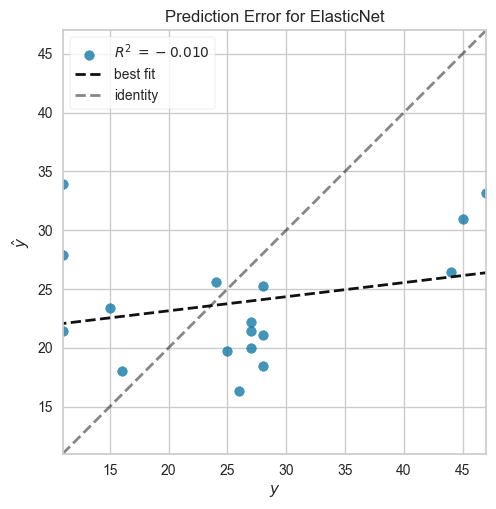

<Axes: title={'center': 'Prediction Error for ElasticNet'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [18]:
visualizer = PredictionError(eNet_multiomics)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# What information does this plot give?
# What does the line of identity tell us?

In [19]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot

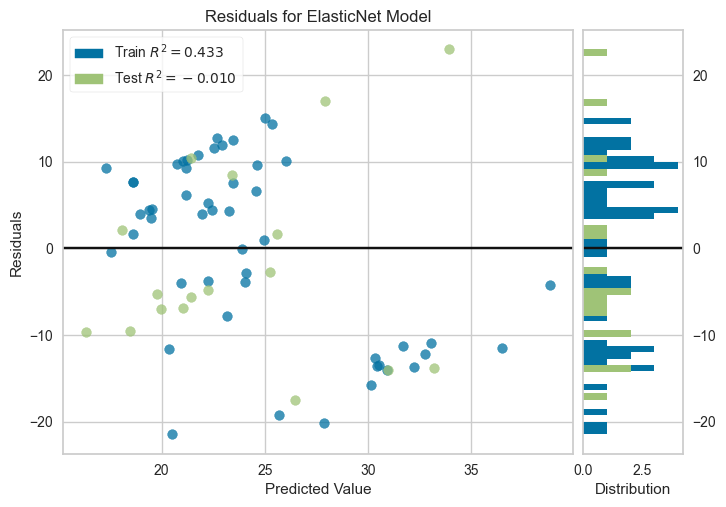

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
visualizer = ResidualsPlot(eNet_multiomics)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# What information does this plot give?

In [21]:
# ElasticNet regression with several values of lambda
# Setting the parameters
# Alphas
alphas = 10**np.linspace(10, 100, 10)*0.5
# Lambda
l_min = 0.01
l_max = 0.2
l_num = 10
lambdas = np.linspace(l_min, l_max, l_num)
# Prediction
pred_num = X.shape[1]
# Coefficients
coef_a = np.zeros((l_num, pred_num))

# The r-squared
Rsq_train = np.zeros(l_num)
Rsq_test = np.zeros(l_num)

# Enumerating through lambdas with ind and i

for ind, i in enumerate(lambdas):
    eNet_multiomics = ElasticNet(alpha = i).fit(X_train, y_train)
    coef_a[ind, :] = eNet_multiomics.coef_
    Rsq_train[ind] = eNet_multiomics.score(X_train, y_train)
    Rsq_train[ind] = eNet_multiomics.score(X_train, y_train)

/Users/maviano/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.433e+01, tolerance: 9.533e-01
  model = cd_fast.enet_coordinate_descent(
/Users/maviano/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+00, tolerance: 9.533e-01
  model = cd_fast.enet_coordinate_descent(


In [22]:
# Plotting the r-squared as a function of the lambda values
import matplotlib.pyplot as plt
%matplotlib inline

/var/folders/49/536gw7js5kjb7d3yg9lh5x3c0000gn/T/ipykernel_7597/2127822814.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(Rsq_train, 'bo-', label = r'$R^2$ Training dataset', color = 'blue', alpha = 0.6, linewidth = 4)
/var/folders/49/536gw7js5kjb7d3yg9lh5x3c0000gn/T/ipykernel_7597/2127822814.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(Rsq_test, 'bo-', label = r'$R^2$ Test dataset', color = 'red', alpha = 0.6, linewidth = 4)


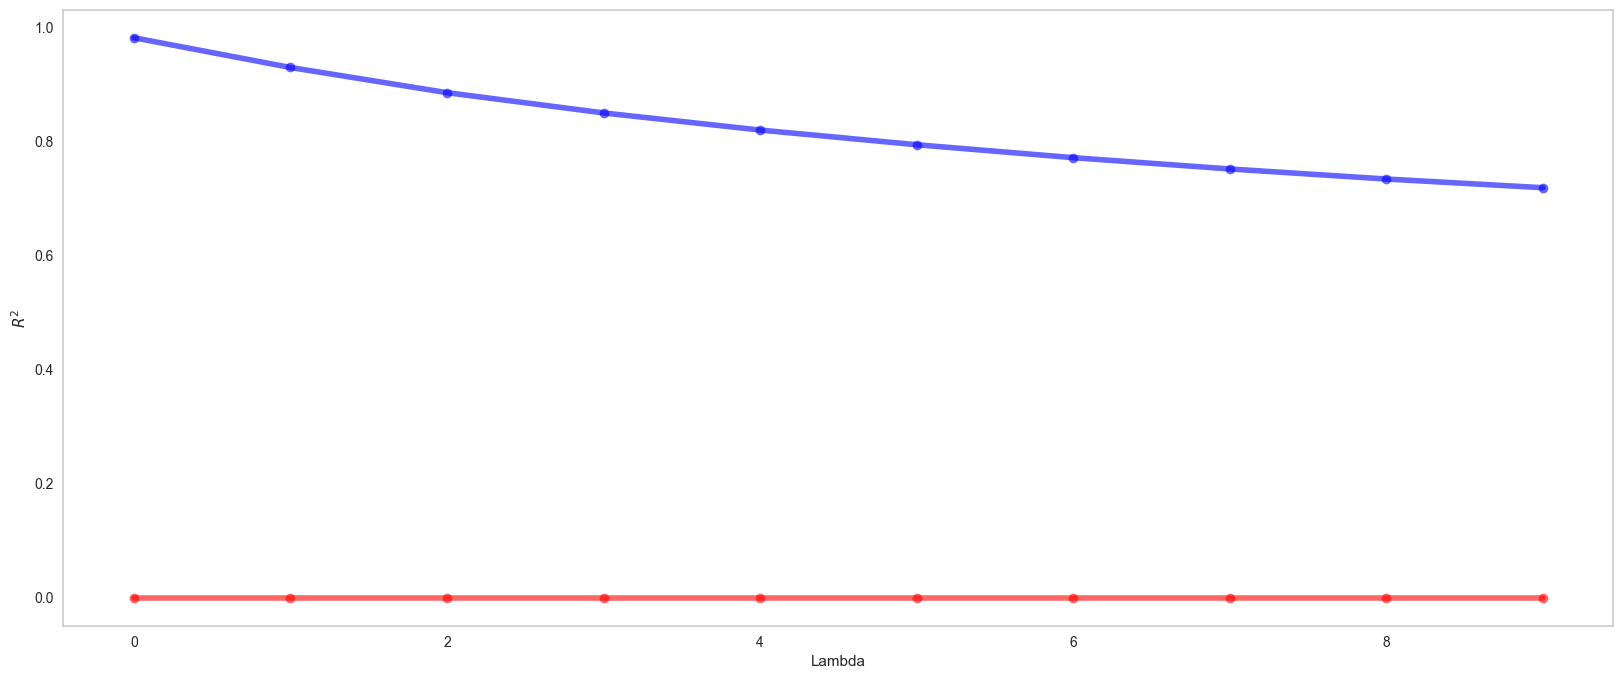

In [23]:
# Plotting the r2
plt.figure(figsize = (20, 8))
plt.plot(Rsq_train, 'bo-', label = r'$R^2$ Training dataset', color = 'blue', alpha = 0.6, linewidth = 4)
plt.plot(Rsq_test, 'bo-', label = r'$R^2$ Test dataset', color = 'red', alpha = 0.6, linewidth = 4)
plt.ylabel(r'$R^2$')
plt.xlabel('Lambda')
plt.grid()

In [24]:
# Making prediction on test data
y_pred_test = eNet_multiomics.predict(X_test)

y_pred_test

array([22.01138612, 18.44905435, 17.253448  , 14.6437315 , 15.17618835,
       18.75070186, 24.03202863, 13.22509546, 23.85479094, 28.90464081,
       18.23941678, 43.92417811, 37.4981469 , 24.01333788,  9.98018156,
       24.84377028, 42.94598714])

In [25]:
# The r_squared of the prediction
from sklearn.metrics import r2_score

In [26]:
Rsq_test = r2_score(y_test, y_pred_test)
Rsq_test

-0.3660096149512795

In [27]:
# The RMSE
from sklearn.metrics import mean_squared_error

In [28]:
# RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_test

12.808706183694113

In [29]:
# The RMSE on the training set
# Prediction on the training set
y_pred_train = eNet_multiomics.predict(X_train)
y_pred_train

array([12.72677744, 15.12792732, 34.84061524, 13.72266065, 26.63471863,
       16.87876558, 20.61546646, 34.50951113, 37.65373705, 17.52734181,
       50.04253202, 16.04609142, 23.98072145, 16.48250905, 22.37638598,
       29.58250532, 17.83590571, 16.15972177, 48.50187648, 23.70738039,
       18.18230764, 38.68416595, 35.38745889, 19.64696063, 39.10185095,
       16.94854746, 18.27730545, 22.60362779, 15.51151064, 14.23667636,
       18.81541745, 23.49695868, 22.67329291, 40.42493601, 24.2683288 ,
       17.08436375, 20.28099246, 33.33414112, 12.49972181, 24.67399164,
       41.59387622, 19.93972956, 18.0515705 , 19.96859675, 21.10279577,
       38.14723784, 24.00519668, 22.54435184, 23.86392829, 16.82891005,
       23.86809923])

In [30]:
# RMSE Train
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_train

7.244663977094903

In [31]:
# Model tuning using ElasticNetCV
from sklearn.linear_model import ElasticNetCV

In [37]:
# 10-folds CV
eNet_multiomics_cv = ElasticNetCV(alphas = np.random.randint(10, 100, 10), cv = 10).fit(X_train, y_train)
# Why do you choose to generate alphas randomly?

In [38]:
# Printing the scores
eNet_multiomics_cv.alphas

array([61, 94, 32, 83, 34, 60, 47, 77, 80, 51])

In [39]:
# Printing optimal alpha
eNet_multiomics_cv.alpha_

94

In [40]:
# Creating a new model with the optimal alpha
eNet_multiomics_tuned = ElasticNet().set_params(alpha = eNet_multiomics_cv.alpha_).fit(X_train, y_train)

In [41]:
# Prediction on the test set
y_pred_tuned = eNet_multiomics_tuned.predict(X_test)
y_pred_tuned

# Why is y_pred_tuned different from y_test?

array([24.33333333, 24.33333333, 24.33333333, 24.33333333, 24.33333333,
       24.33333333, 24.33333333, 24.33333333, 24.33333333, 24.33333333,
       24.33333333, 24.33333333, 24.33333333, 24.33333333, 24.33333333,
       24.33333333, 24.33333333])

In [140]:
# Computing the RMSE
print('Test set', y_test)
print('Observed data', y_pred_tuned)

rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
rmse_tuned

Test set [17 11 15 11 15 17 46 43 10 18 11 15 48 18 28 48 45]
Observed data [24.80392157 24.80392157 24.80392157 24.80392157 24.80392157 24.80392157
 24.80392157 24.80392157 24.80392157 24.80392157 24.80392157 24.80392157
 24.80392157 24.80392157 24.80392157 24.80392157 24.80392157]


14.487569079176598

In [62]:
import warnings;warnings.simplefilter('ignore')

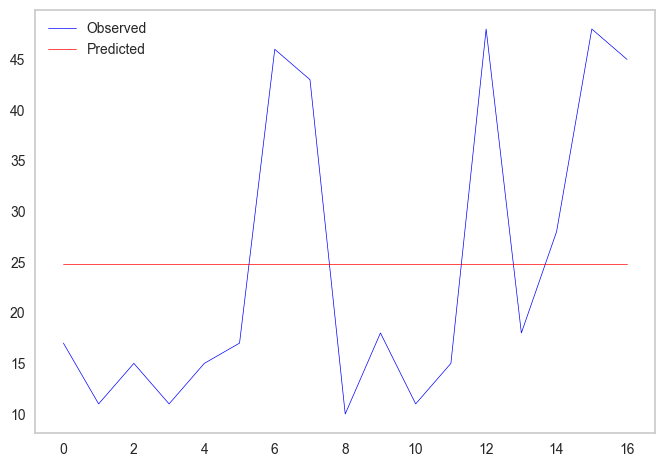

In [66]:
# Plot of the observed and predicted values of gestational age

x_ax = range(len(X_test))
plt.plot(x_ax, y_test, lw = 0.5, color = 'blue', label = 'Observed')
plt.plot(x_ax, y_pred_tuned, lw = 0.5, color = 'red', label = 'Predicted')
plt.legend(loc='best')
plt.grid()

# This graph shows that there's something wrong somewhere

Support Vector Regression

In [67]:
# Support Vector Regression
from sklearn.svm import SVR

In [68]:
# Creating and fitting the SVR model
y_svr = SVR().fit(X_train, y_train)

In [85]:
# Print the R_sq
print('The r_sq is: %.4f' % y_svr.score(X_train, y_train))

The r_sq is: 0.0206


In [74]:
# Training model evaluation
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

In [75]:
# Predicting on the training data
y_train_pred = y_svr.predict(X_train)

In [86]:
print('The r_sq is: %.4f'% r2_score(y_train, y_train_pred))

The r_sq is: 0.0206


In [87]:
# The MAE
print('The MAE is: %.4f' % mean_absolute_error(y_train, y_train_pred))

The MAE is: 10.4088


In [88]:
# The MSE
print('The MSE is: %.4f' % mean_squared_error(y_train, y_train_pred))

The MSE is: 154.3651


In [89]:
# The RMSE
print('The RMSE is: %.4f' % np.sqrt(mean_squared_error(y_train, y_train_pred)))

The RMSE is: 12.4244


In [90]:
# The explained variance score EVS
print('The EVS is: %.4f' % explained_variance_score(y_train, y_train_pred))

The EVS is: 0.0220


In [81]:
# Prediction on the test set
y_test_pred = y_svr.predict(X_test)

In [82]:
print(y_test_pred[:10])

[24.70949345 23.99031603 23.98547795 24.4509991  23.98617032 24.28123762
 24.41947145 24.03882887 24.90073385 24.0668359 ]


In [91]:
# The coefficient of determination
print('The r_sq is : %.4f' % r2_score(y_test, y_test_pred))

The r_sq is : 0.0049


In [93]:
print('The r_sq is: %.4f' % y_svr.score(X_test, y_test))

The r_sq is: 0.0049


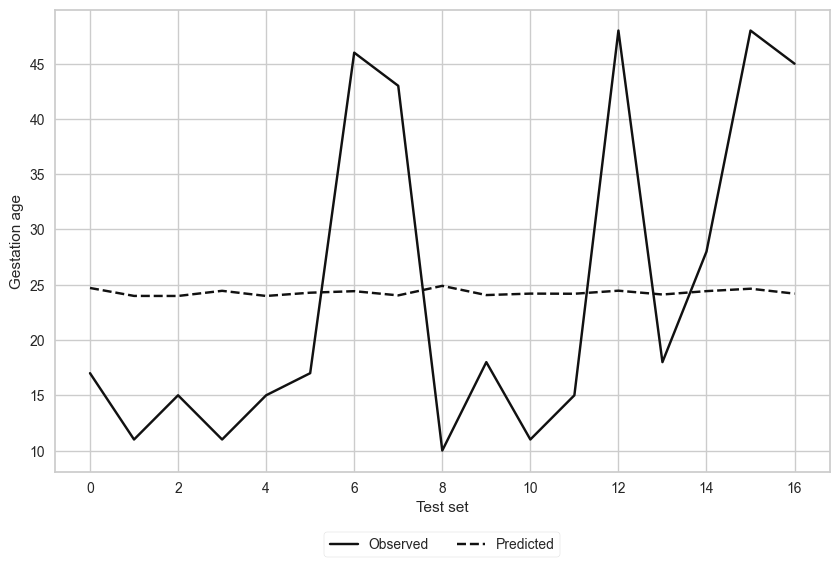

In [100]:
# Plotting the observed and predicted gestation age
# Set the boundaries and other characteristics
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('Gestation age')
plt.xlabel('Test set')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = True)
plt.show()

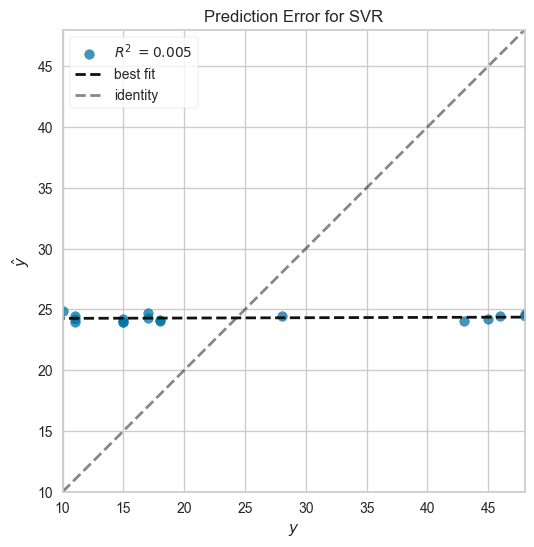

<Axes: title={'center': 'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [101]:
# Plotting the prediction errors and residuals 
# Prediction errors plot
visualizer = PredictionError(y_svr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

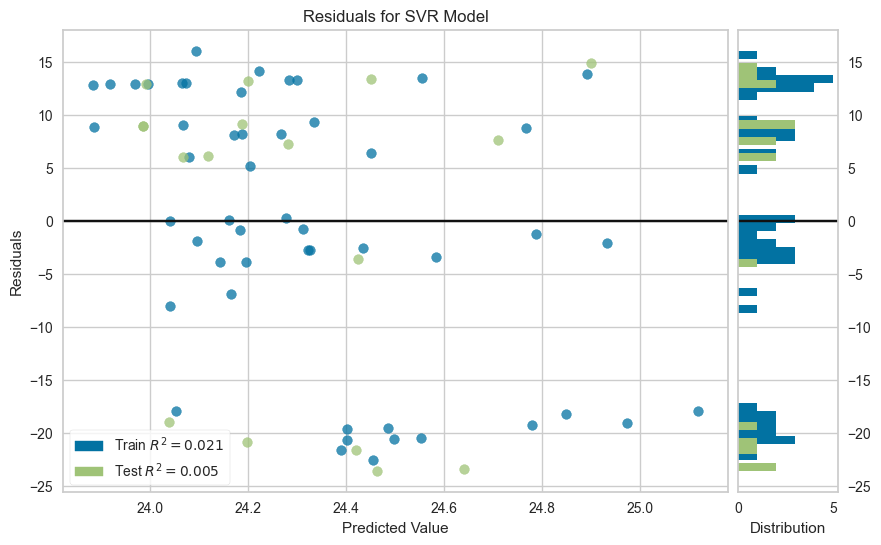

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [105]:
# The residual plot
#from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(y_svr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [107]:
# Testing model evaluation
# The MAE
print('The MAE is: %.4f' % mean_absolute_error(y_test, y_test_pred))

The MAE is: 12.98


In [108]:
# The MSE
print('The MSE is: %.4f' % mean_squared_error(y_test, y_test_pred))

The MSE is: 208.76


In [109]:
# The RMSE
print('The RMSE is: %.4f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))

The RMSE is: 14.45


In [110]:
# The EVS 
print('The EVS is: %.4f' % explained_variance_score(y_test, y_test_pred))

The EVS is: 0.0050


In [111]:
# The k fold cross-validation 
from sklearn.model_selection import cross_val_score

In [113]:
# On the training dataset
score_train = cross_val_score(y_svr, X_train, y_train, scoring = 'r2', cv = 10)
score_train

array([-5.27496208e+00,  5.51416717e-03,  1.31734383e-02, -2.77979940e+00,
       -8.67092211e-02, -3.15869189e-01, -7.62990426e-01, -4.25373882e-02,
       -1.47592861e+00,  2.79115329e-03])

In [114]:
# Mean score
print(np.mean(score_train))

-1.071731755152919


In [115]:
# On the testing dataset
score_test = cross_val_score(y_svr, X_test, y_test, scoring = 'r2', cv = 10)
score_test

array([  -1.67710155,   -5.81409384,   -3.41315925, -339.22192399,
         -0.63880508,   -6.07936972,   -1.14168451,           nan,
                 nan,           nan])

In [116]:
# The mean score
print(np.mean(score_test))

nan


### Sex of the baby

1. Try using a neural network in Tensorflow or PyTorch to predict the sex of the baby. 
2. Try to optimize the network the bast you can (don't spend too much time on this though).

### Feedback

Were the tasks above difficult, easy, or a mixture? In both cases, briefly describe why.